In [1]:
from keras import models, layers, optimizers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
__________

/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/site-packages/keras/engine/training.py:478: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


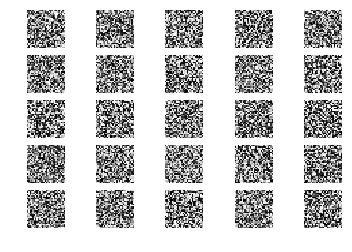

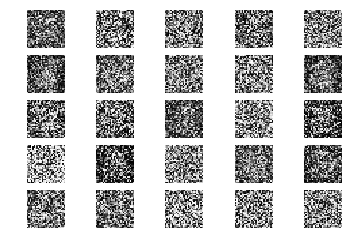

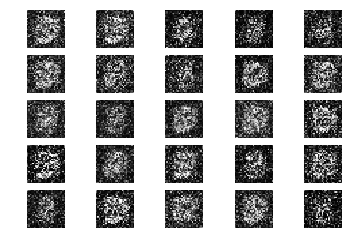

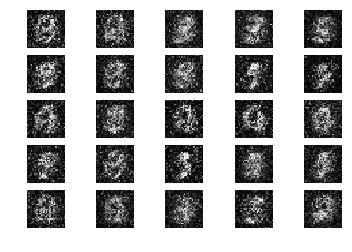

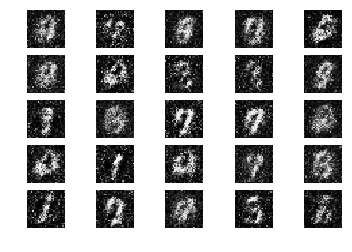

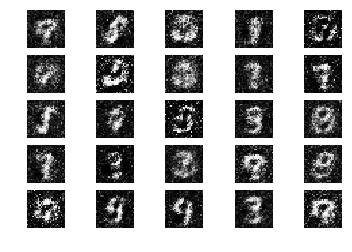

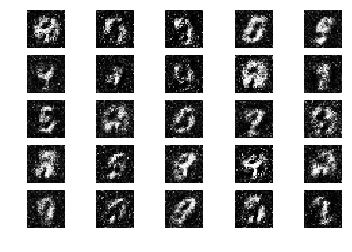

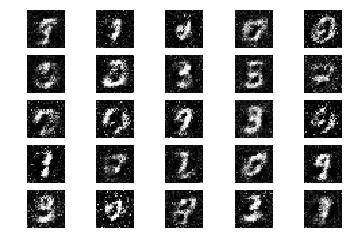

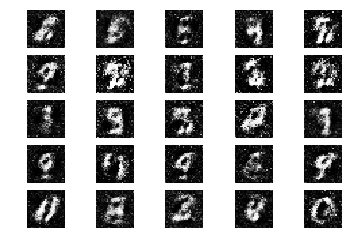

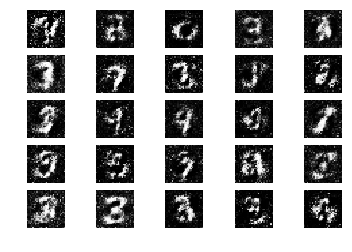

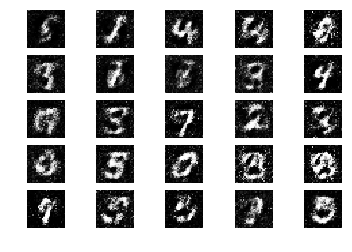

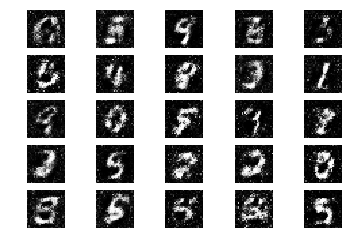

KeyboardInterrupt: 

In [2]:
# Some parameters.
latent_dim = 100
input_shape = (28, 28, 1)
        
# Generator.
generator = models.Sequential()
generator.add(layers.Dense(256, input_dim=latent_dim))
generator.add(layers.LeakyReLU(alpha=0.2))
generator.add(layers.BatchNormalization(momentum=0.8))
generator.add(layers.Dense(512))
generator.add(layers.LeakyReLU(alpha=0.2))
generator.add(layers.BatchNormalization(momentum=0.8))
generator.add(layers.Dense(1024))
generator.add(layers.LeakyReLU(alpha=0.2))
generator.add(layers.BatchNormalization(momentum=0.8))
generator.add(layers.Dense(np.prod(input_shape), activation='tanh'))
generator.add(layers.Reshape(input_shape))

# Discriminator.
discriminator = models.Sequential()
discriminator.add(layers.Flatten(input_shape=input_shape))
discriminator.add(layers.Dense(512))
discriminator.add(layers.LeakyReLU(alpha=0.2))
discriminator.add(layers.Dense(256))
discriminator.add(layers.LeakyReLU(alpha=0.2))
discriminator.add(layers.Dense(1, activation='sigmoid'))
discriminator.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.Adam(0.0002, 0.5),
    metrics=["accuracy"])
        
# Load and transform the dataset.
(x_input_train, _), (_, _) = mnist.load_data()
x_input_train = x_input_train / 127.5 - 1.
x_input_train = np.expand_dims(x_input_train, axis=3)

# Create the net and train.
gan = ngdlmodels.GAN(generator=generator, discriminator=discriminator)
gan.compile(
    optimizer=optimizers.Adam(0.0002, 0.5),
    loss="binary_crossentropy",
    metrics=['accuracy'])
gan.summary()
history = gan.fit(x_input_train, epochs=30000, batch_size=32, sample_interval=200)